# Simulating MIMIC Patient (No Sepsis)
We used Pulse to simulate patients in MIMIC (without adding the Sepsis condition), initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. The idea is to compare patient trajectories for identical patients with and without Sepsis. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient in MIMIC with their simulated counterpart. This version includes the env changes induced every hour based on patients' FiO2 readings.

In [1]:
import pandas as pd
icustayid = 14180.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(export_dir + "simulation_v2_" + str(icustayid) + "_final.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,90.93678096509996,4551.300611782578,9.841085213880591,36.99745934783675,59.570054149179306,34.40467070846232,111.11111111111109,0.6680000000000001,78.13594662687855,0.9767468318255798,20.00000000000003,0.0,95.0526164663995,4.251699e+09
1,76.76897876829265,5567.245356188513,35.73055787314208,37.20678221804377,50.02380936403763,35.316489685337665,74.99999999999996,-0.0040000000000000036,78.87433182870339,0.9962611555953472,20.2702702702703,25200.000000457218,105.44259961101123,4.251724e+09
2,100.57529957020505,5701.793792217912,9.39355203894929,37.206208625506974,49.73501196265501,35.348272519444045,73.17073170731703,0.0,79.99128739284879,0.9962824322157664,20.134228187919494,28800.000000535798,108.0163913007182,4.251728e+09
3,61.36473814965081,5977.178430764369,2.0939942530499893,37.20378957870264,44.52350597247609,35.35687079355041,63.82978723404253,0.0,77.14659020639844,0.9963377616016471,20.134228187919494,32400.00000061438,108.73411125141976,4.251731e+09
4,100.39774151440142,6288.494896576938,0.38901398600064924,37.202548802528554,45.000635821608164,35.3380958981751,62.499999999999964,0.0,80.74508168773052,0.996388619577141,20.134228187919494,36000.00000010506,115.4258515525007,4.251735e+09


In [4]:
len(simulation)

48

In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()


,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

48

In [7]:
MIMICtable_filtered.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
416,1.0,14180.0,4.251699e+09,0.0,19542.730417,5.0,0.0,0.0,0.0,0.0,...,1.168421,219.444444,0.0,0.0,0.000000,0.000000,14650.0,7325.0,-14650.000000,1.0
417,8.0,14180.0,4.251724e+09,0.0,19542.730417,5.0,0.0,0.0,0.0,0.0,...,1.178947,130.555556,0.0,0.0,15.512000,15.512000,21975.0,7325.0,-21959.488000,1.0
418,9.0,14180.0,4.251728e+09,0.0,19542.730417,5.0,0.0,0.0,0.0,0.0,...,1.168421,713.888889,0.0,0.0,181.693750,166.181750,29300.0,7325.0,-29118.306250,1.0
419,10.0,14180.0,4.251731e+09,0.0,19542.730417,5.0,0.0,0.0,0.0,0.0,...,1.234043,713.888889,0.0,0.0,398.098750,216.405000,36625.0,7325.0,-36226.901250,1.0
420,11.0,14180.0,4.251735e+09,0.0,19542.730417,5.0,0.0,0.0,0.0,0.0,...,1.142857,213.888889,0.0,0.0,455.798267,57.699517,43000.0,6375.0,-42544.201733,1.0


In [8]:
time = MIMICtable_filtered['charttime']
diaBP_pulse = simulation['DiastolicArterialPressure (mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

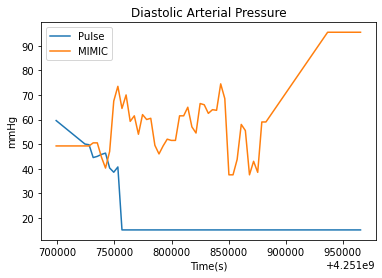

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_pulse))
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

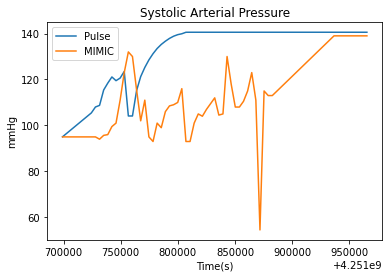

In [10]:
sysBP_pulse = simulation['SystolicArterialPressure (mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_pulse))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

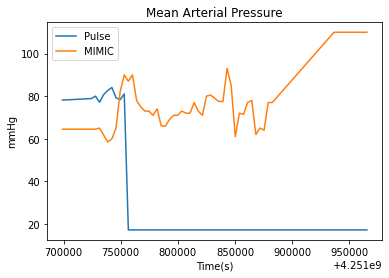

In [11]:
meanBP_pulse = simulation['MeanArterialPressure (mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_pulse))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

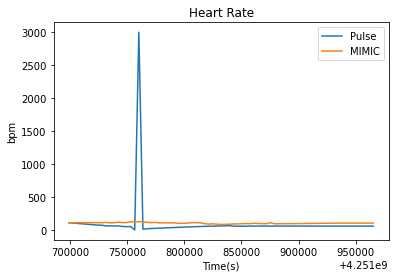

In [12]:
HR_pulse = simulation['HeartRate (1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_pulse))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

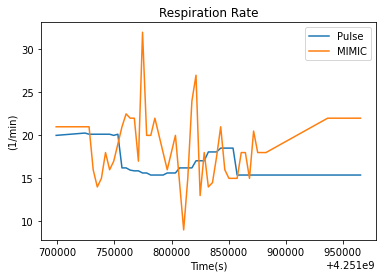

In [13]:
RR_pulse = simulation['RespirationRate (1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_pulse))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

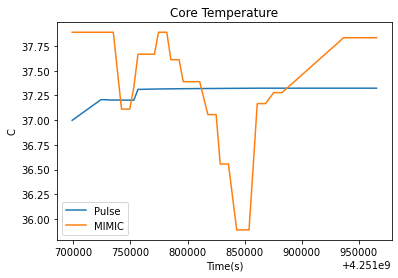

In [14]:
temp_pulse = simulation['CoreTemperature (degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_pulse))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Pulse', 'MIMIC'])
plt.show()